In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv('gwosctable.csv')

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                93 non-null     object 
 1   commonName                        93 non-null     object 
 2   version                           93 non-null     int64  
 3   catalog.shortName                 93 non-null     object 
 4   GPS                               93 non-null     float64
 5   reference                         93 non-null     object 
 6   jsonurl                           93 non-null     object 
 7   mass_1_source                     90 non-null     float64
 8   mass_1_source_lower               90 non-null     float64
 9   mass_1_source_upper               90 non-null     float64
 10  mass_2_source                     90 non-null     float64
 11  mass_2_source_lower               90 non-null     float64
 12  mass_2_sou

(None,
             id commonName  version catalog.shortName           GPS  \
 0  GW150914-v3   GW150914        3  GWTC-1-confident  1.126259e+09   
 1  GW151012-v3   GW151012        3  GWTC-1-confident  1.128679e+09   
 2  GW151226-v2   GW151226        2  GWTC-1-confident  1.135136e+09   
 3  GW170104-v2   GW170104        2  GWTC-1-confident  1.167560e+09   
 4  GW170608-v3   GW170608        3  GWTC-1-confident  1.180922e+09   
 
                            reference  \
 0  https://doi.org/10.7935/82H3-HH23   
 1  https://doi.org/10.7935/82H3-HH23   
 2  https://doi.org/10.7935/82H3-HH23   
 3  https://doi.org/10.7935/82H3-HH23   
 4  https://doi.org/10.7935/82H3-HH23   
 
                                              jsonurl  mass_1_source  \
 0  http://gwosc.org/eventapi/json/GWTC-1-confiden...           35.6   
 1  http://gwosc.org/eventapi/json/GWTC-1-confiden...           23.2   
 2  http://gwosc.org/eventapi/json/GWTC-1-confiden...           13.7   
 3  http://gwosc.org/eventapi

In [3]:
df.describe()

,version,GPS,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,...,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
count,93.000000,9.300000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,93.000000,85.000000,...,90.000000,9.300000e+01,0.0,0.0,92.000000,0.0,0.0,89.000000,88.000000,88.000000
mean,1.623656,1.243403e+09,35.355111,-7.931111,15.454667,21.744556,-7.049444,7.384222,12.231848,-0.535294,...,0.202333,3.309618e+00,NaN,NaN,0.906656,NaN,NaN,55.291124,-8.117273,15.152159
std,0.721019,3.010448e+07,20.613062,6.741347,24.257446,14.044993,6.179839,6.979778,4.889400,0.431141,...,0.237851,1.536689e+01,NaN,NaN,0.168050,NaN,NaN,31.657035,7.885601,24.881429
min,1.000000,1.126259e+09,1.460000,-33.000000,0.120000,1.170000,-36.500000,0.070000,4.500000,-3.000000,...,0.000000,1.000000e-07,NaN,NaN,0.121102,NaN,NaN,2.800000,-47.000000,1.300000
25%,1.000000,1.241816e+09,21.400000,-9.675000,5.650000,8.325000,-9.300000,2.250000,9.047895,-0.600000,...,0.062500,1.000000e-05,NaN,NaN,0.854410,NaN,NaN,32.100000,-11.000000,4.100000
50%,2.000000,1.251009e+09,35.500000,-6.000000,9.550000,23.550000,-5.900000,5.350000,10.800000,-0.400000,...,0.115000,1.300000e-03,NaN,NaN,0.990000,NaN,NaN,56.300000,-6.500000,8.600000
75%,2.000000,1.260808e+09,43.100000,-3.125000,14.700000,29.000000,-2.425000,9.450000,13.200000,-0.300000,...,0.260000,4.600000e-01,NaN,NaN,1.000000,NaN,NaN,70.500000,-2.775000,16.025000
max,4.000000,1.268904e+09,105.500000,-0.100000,166.000000,76.000000,-0.060000,36.000000,33.000000,-0.200000,...,1.470000,1.400000e+02,NaN,NaN,1.000000,NaN,NaN,172.900000,-0.660000,169.000000


In [4]:
df.isnull().sum()

id                                   0
commonName                           0
version                              0
catalog.shortName                    0
GPS                                  0
reference                            0
jsonurl                              0
mass_1_source                        3
mass_1_source_lower                  3
mass_1_source_upper                  3
mass_2_source                        3
mass_2_source_lower                  3
mass_2_source_upper                  3
network_matched_filter_snr           0
network_matched_filter_snr_lower     8
network_matched_filter_snr_upper     8
luminosity_distance                  3
luminosity_distance_lower            3
luminosity_distance_upper            3
chi_eff                              3
chi_eff_lower                        3
chi_eff_upper                        3
total_mass_source                   14
total_mass_source_lower             14
total_mass_source_upper             14
chirp_mass_source        

First we will define the classification criteria for BBH , BHNS , BNS based on their mass.
* $$ BBH : Both-masses > 3M\odot$$
* $$ BHNS : m1 < 3M\odot , m2 > 3M\odot$$
* $$ BNS : Both-masses < 3M\odot$$

In [5]:

def classify_event(row):
    m1, m2 = row['mass_1_source'], row['mass_2_source']
    if m1 > 3 and m2 > 3:
        return 'BBH'  # Binary Black Hole
    elif (m1 < 3 and m2 > 3) or (m1 > 3 and m2 < 3):
        return 'NSBH'  # Neutron Star-Black Hole
    elif m1 < 3 and m2 < 3:
        return 'BNS'  # Binary Neutron Star
    else:
        return 'Unknown'


df['event_type'] = df.apply(classify_event, axis=1)


df['event_type'].value_counts()


event_type
BBH        83
NSBH        5
Unknown     3
BNS         2
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [7]:
df = df[df['event_type'] != 'Unknown'] #dropping unknown events

In [12]:
features = ["mass_1_source", "mass_2_source", "chirp_mass_source", "total_mass_source", 
            "network_matched_filter_snr", "luminosity_distance", "chi_eff", "redshift"]

In [13]:
X= df[features].fillna(df[features].median())

label_encoder =LabelEncoder()
y = label_encoder.fit_transform(df['event_type'])

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [40]:
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
class_counts_before = np.bincount(y_train)

In [41]:
# Apply Random Over-Sampling
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
class_counts_after = np.bincount(y_train_ros)

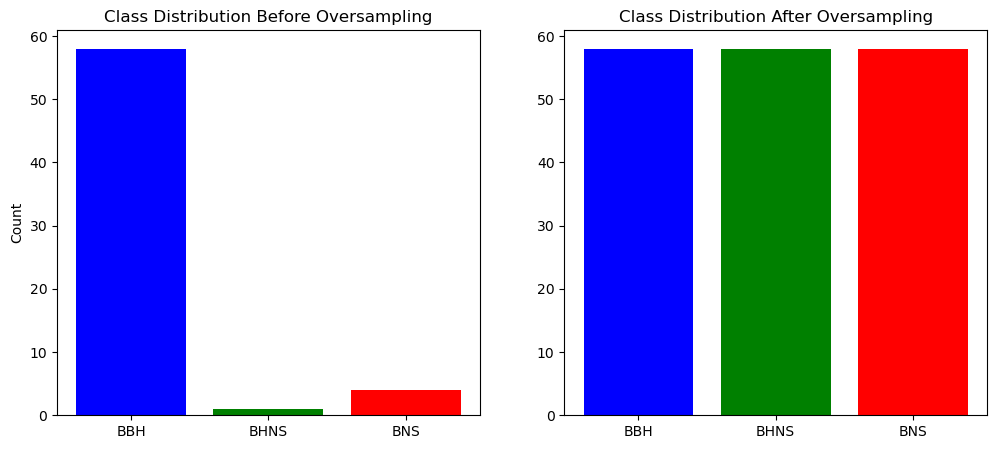

In [42]:
# Plot class distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(["BBH", "BHNS", "BNS"], class_counts_before, color=['blue', 'green', 'red'])
ax[0].set_title("Class Distribution Before Oversampling")
ax[0].set_ylabel("Count")

ax[1].bar(["BBH", "BHNS", "BNS"], class_counts_after, color=['blue', 'green', 'red'])
ax[1].set_title("Class Distribution After Oversampling")

plt.show()

In [28]:
np.bincount(y_train_ros)

array([58, 58, 58], dtype=int64)

In [31]:
!pip install xgboost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [32]:
# Define classifiers
models = {
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [33]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_ros, y_train_ros)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\n")

D:\Ana installer\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


=== AdaBoost ===
              precision    recall  f1-score   support

         BBH       1.00      1.00      1.00        25
         BNS       1.00      1.00      1.00         1
        NSBH       1.00      1.00      1.00         1

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



=== XGBoost ===
              precision    recall  f1-score   support

         BBH       1.00      1.00      1.00        25
         BNS       1.00      1.00      1.00         1
        NSBH       1.00      1.00      1.00         1

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27





D:\Ana installer\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Gradient Boost ===
              precision    recall  f1-score   support

         BBH       1.00      1.00      1.00        25
         BNS       0.00      0.00      0.00         1
        NSBH       0.00      0.00      0.00         1

    accuracy                           0.93        27
   macro avg       0.33      0.33      0.33        27
weighted avg       0.93      0.93      0.93        27





D:\Ana installer\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Ana installer\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Ana installer\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

=== Logistic Regression ===
              precision    recall  f1-score   support

         BBH       0.96      1.00      0.98        25
         BNS       0.00      0.00      0.00         1
        NSBH       1.00      1.00      1.00         1

    accuracy                           0.96        27
   macro avg       0.65      0.67      0.66        27
weighted avg       0.93      0.96      0.94        27



=== Random Forest ===
              precision    recall  f1-score   support

         BBH       1.00      1.00      1.00        25
         BNS       1.00      1.00      1.00         1
        NSBH       1.00      1.00      1.00         1

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27





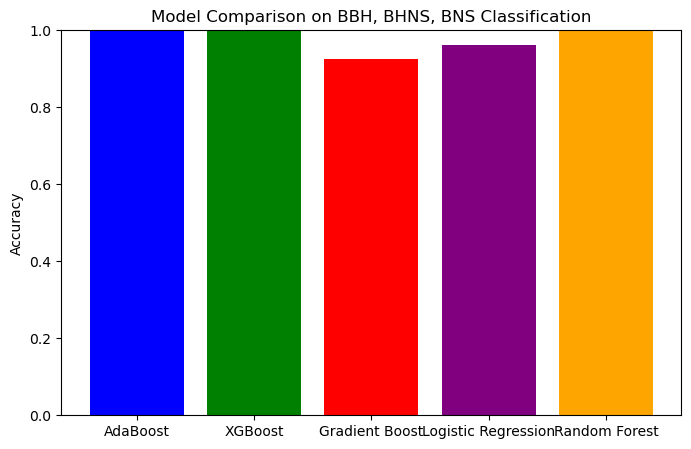

In [39]:
# Plot model comparison
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison on BBH, BHNS, BNS Classification")
plt.ylim(0, 1)
plt.show()

D:\Ana installer\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\1135281767.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\1135281767.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\1135281767.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=

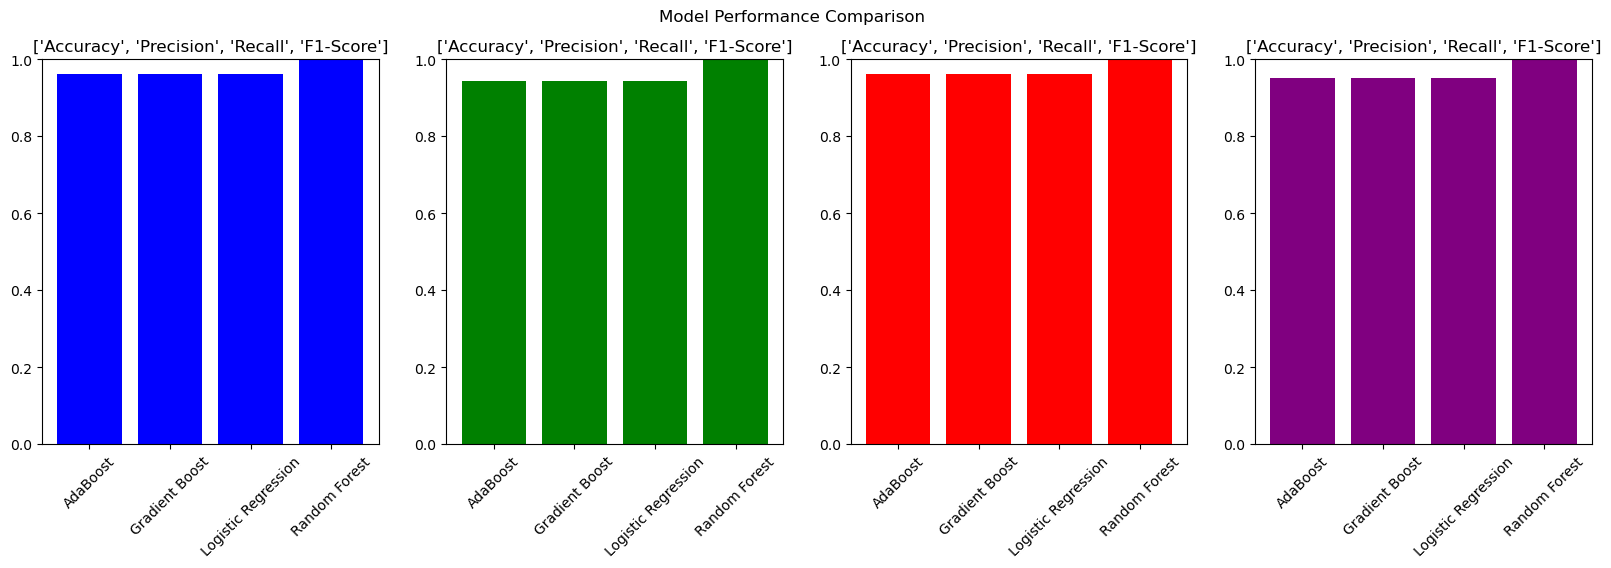

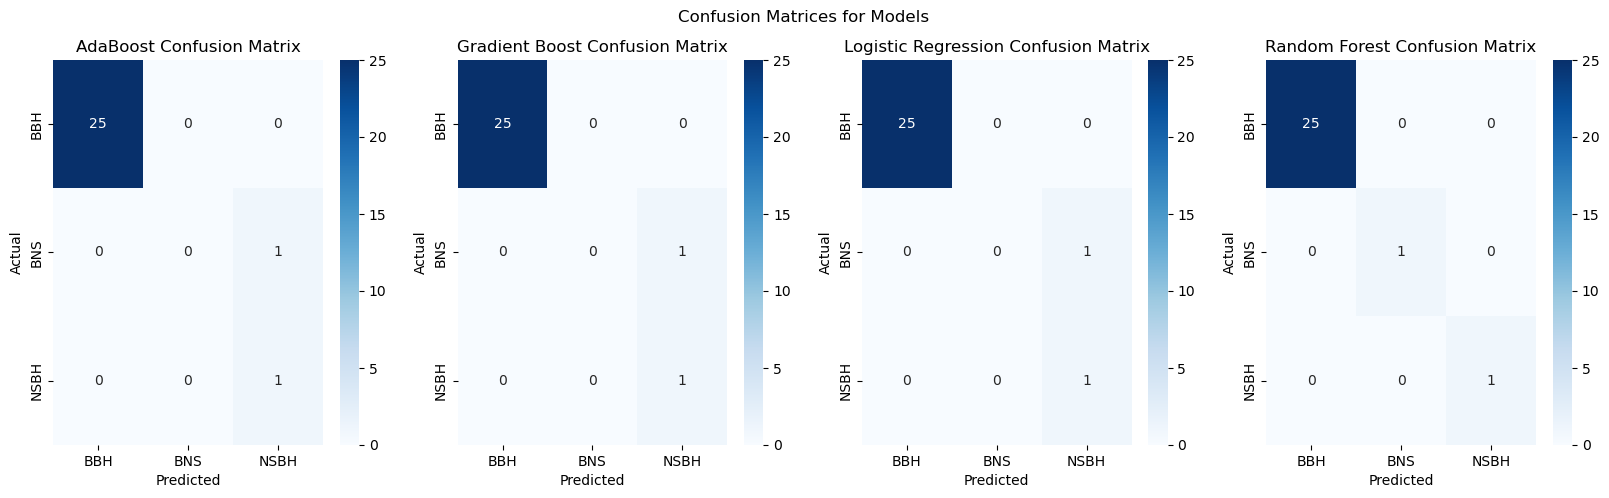

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize results dictionary
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train and evaluate models
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train_ros, y_train_ros)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1-Score"].append(f1)

    # Compute confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

#Convert results to DataFrame
results_df = pd.DataFrame(results)

#metrics
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ['blue', 'green', 'red', 'purple','yellow']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df["Model"], results_df[metric], color=colors[i])
    axes[i].set_title(metrics)
    axes[i].set_ylim(0, 1)
    axes[i].set_xticklabels(results_df["Model"], rotation=45)

plt.suptitle("Model Performance Comparison")
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for i, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.suptitle("Confusion Matrices for Models")
plt.show()
